In [168]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split        # function 

 # drop null_values
 # drop (wage_eur)  with value 0 
 # handel outliers 
 # handel catigurical_data

In [169]:
d = pd.read_csv(r"E:\Eng. Ahmed Rady\machine_lectures\fifa_players.csv")          
d.head()     

,wage_eur,age,height_cm,weight_kg,nationality_name,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_agility,movement_reactions,movement_balance,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,320000.0,34.0,170.0,72.0,b'Argentina',93.0,93.0,85.0,95.0,70.0,...,91.0,94.0,95.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,270000.0,32.0,185.0,81.0,b'Poland',92.0,92.0,71.0,95.0,90.0,...,77.0,93.0,82.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,270000.0,36.0,187.0,83.0,b'Portugal',91.0,91.0,87.0,95.0,90.0,...,86.0,94.0,74.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
3,270000.0,29.0,175.0,68.0,b'Brazil',91.0,91.0,85.0,83.0,63.0,...,96.0,89.0,84.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0
4,350000.0,30.0,181.0,70.0,b'Belgium',91.0,91.0,94.0,82.0,55.0,...,79.0,91.0,78.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0


In [170]:
model = LinearRegression()     # model 
x = d.drop(["nationality_name" , "wage_eur"],axis = 1)     
# x = all data except the value the will be predicted and (data with type object) (axis = 1 to drop the columns)
y = d["wage_eur"]      # value that will be predicted 
model.fit(x,y)        # fit data
model.score(x,y)      # compute accurecy (small)

0.39316473973973953

In [171]:
d=d.dropna()
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19178 entries, 0 to 19177
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   wage_eur                    19178 non-null  float64
 1   age                         19178 non-null  float64
 2   height_cm                   19178 non-null  float64
 3   weight_kg                   19178 non-null  float64
 4   nationality_name            19178 non-null  object 
 5   overall                     19178 non-null  float64
 6   potential                   19178 non-null  float64
 7   attacking_crossing          19178 non-null  float64
 8   attacking_finishing         19178 non-null  float64
 9   attacking_heading_accuracy  19178 non-null  float64
 10  attacking_short_passing     19178 non-null  float64
 11  attacking_volleys           19178 non-null  float64
 12  skill_dribbling             19178 non-null  float64
 13  skill_curve                 191

In [172]:
for col in d.columns:
    if d[col].dtype=="object":
       d[col]= d[col].str.lower()
       d[col] = d[col].replace(" ","_")

In [173]:
d.describe()    # describe data
# wage_eur >> has outliers from 8000 to 350000
# short passing >> 68 to 94
# movement_reactions
# overal 
# potential

,wage_eur,age,height_cm,weight_kg,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_agility,movement_reactions,movement_balance,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,...,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000
mean,9017.989363,25.201168,181.288143,74.930493,65.760246,71.076442,49.568047,45.890239,51.773334,58.860726,...,63.505892,61.436907,64.078319,48.032433,45.890812,16.397278,16.187246,16.049067,16.221660,16.484722
std,19470.176724,4.746183,6.862150,7.065573,6.882432,6.089398,18.031017,19.718198,17.289443,14.488838,...,14.860439,9.042546,14.327970,21.227856,20.750015,17.561204,16.829124,16.555612,17.048276,17.873283
min,500.000000,16.000000,155.000000,49.000000,47.000000,49.000000,6.000000,2.000000,5.000000,7.000000,...,18.000000,25.000000,15.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1000.000000,21.000000,176.000000,70.000000,61.000000,67.000000,38.000000,30.000000,44.000000,54.000000,...,55.000000,56.000000,56.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,3000.000000,25.000000,181.000000,75.000000,66.000000,71.000000,54.000000,50.000000,55.000000,62.000000,...,66.000000,62.000000,66.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,8000.000000,29.000000,186.000000,80.000000,70.000000,75.000000,63.000000,62.000000,64.000000,68.000000,...,74.000000,67.000000,74.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,350000.000000,54.000000,206.000000,110.000000,93.000000,95.000000,94.000000,95.000000,93.000000,94.000000,...,96.000000,94.000000,96.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000


<AxesSubplot:>

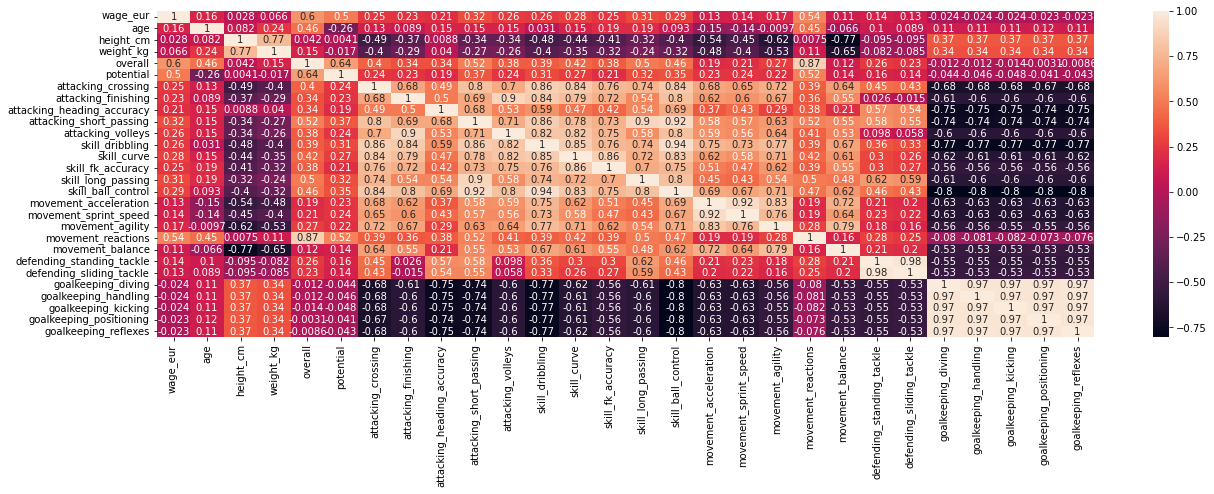

In [174]:
plt.figure(figsize=((21,6)))    # maximize figure size  
sns.heatmap(d.corr(),annot=True)    # visualization with colors
# strong relation between wage_eur and (overall , potential, movement_ractions  )
# we will see corr between (overall , potential, movement_ractions  ) to avoid overfitting 
# (overall with potential >> 0.64)
# (overall with movement_ractions >> 0.87)    drop movement_ractions (less corr )
# (potential with movement_ractions >> 0.52)

<AxesSubplot:xlabel='wage_eur', ylabel='Count'>

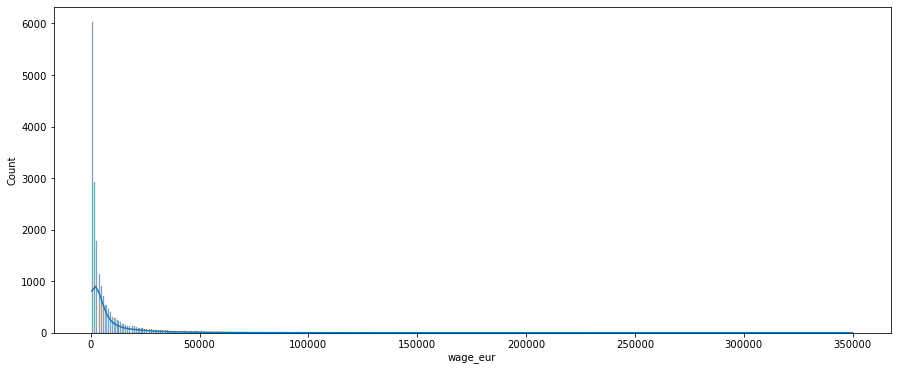

In [175]:
plt.figure(figsize=((15,6)))
sns.histplot(d["wage_eur"],kde=True)      # show distribution of wage_eur_data

<AxesSubplot:xlabel='wage_eur', ylabel='Count'>

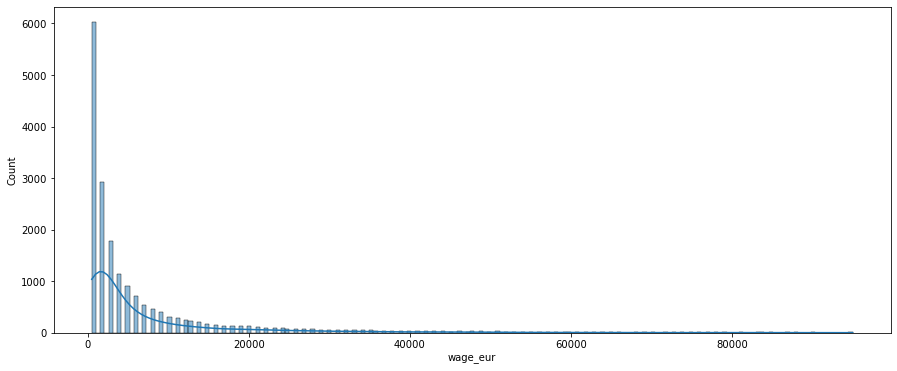

In [176]:
d = d[d["wage_eur"]<100000]    # drop 
plt.figure(figsize=((15,6)))
sns.histplot(d["wage_eur"],kde=True)

<AxesSubplot:xlabel='overall', ylabel='wage_eur'>

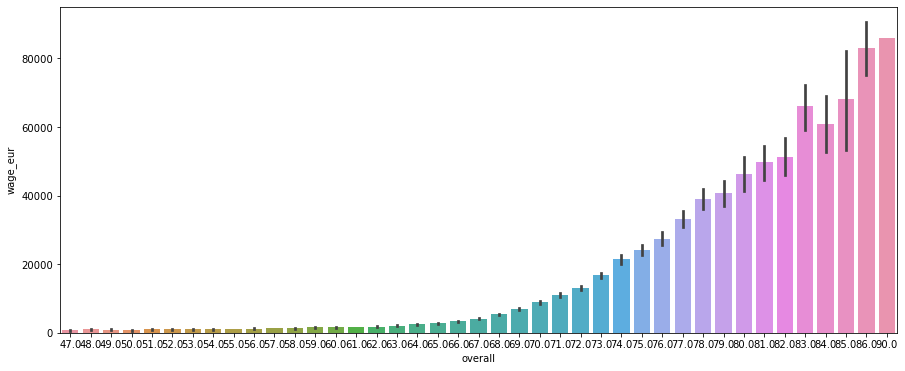

In [177]:
plt.figure(figsize=((15,6)))
sns.barplot(x=d["overall"],y=d["wage_eur"])

<AxesSubplot:xlabel='overall', ylabel='wage_eur'>

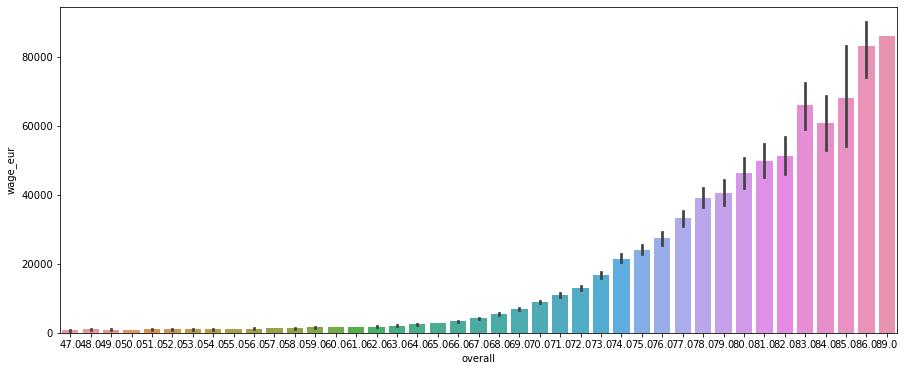

In [178]:
d["overall"] = np.where(d["overall"]>89 , 89 ,d["overall"])
plt.figure(figsize=((15,6)))
sns.barplot(x=d["overall"],y=d["wage_eur"])

<AxesSubplot:xlabel='potential', ylabel='wage_eur'>

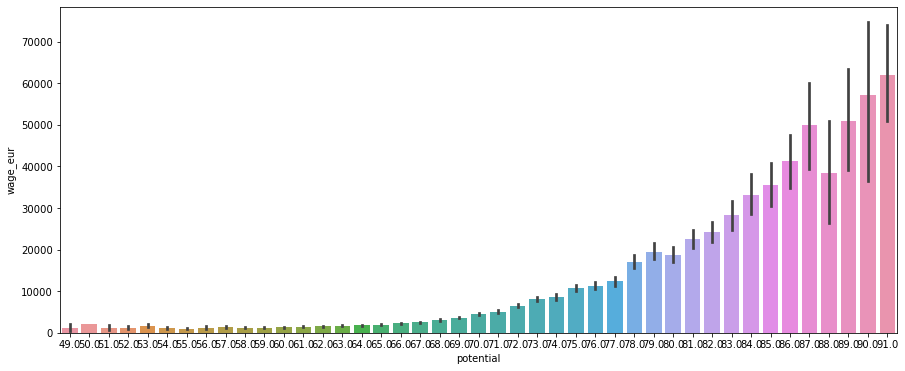

In [179]:
plt.figure(figsize=((15,6)))
sns.barplot(x=d["potential"],y=d["wage_eur"])

<AxesSubplot:xlabel='overall', ylabel='wage_eur'>

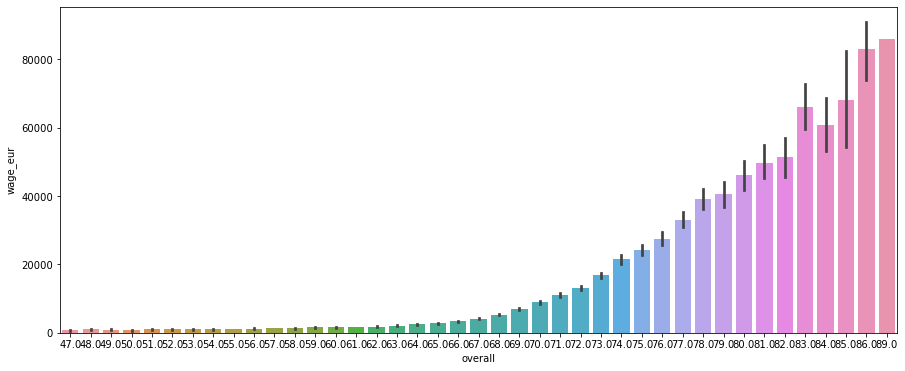

In [180]:
d["potential"] = np.where(d["potential"]>90 , 90 ,d["potential"])
plt.figure(figsize=((15,6)))
sns.barplot(x=d["overall"],y=d["wage_eur"])

In [181]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19008 entries, 7 to 19177
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   wage_eur                    19008 non-null  float64
 1   age                         19008 non-null  float64
 2   height_cm                   19008 non-null  float64
 3   weight_kg                   19008 non-null  float64
 4   nationality_name            19008 non-null  object 
 5   overall                     19008 non-null  float64
 6   potential                   19008 non-null  float64
 7   attacking_crossing          19008 non-null  float64
 8   attacking_finishing         19008 non-null  float64
 9   attacking_heading_accuracy  19008 non-null  float64
 10  attacking_short_passing     19008 non-null  float64
 11  attacking_volleys           19008 non-null  float64
 12  skill_dribbling             19008 non-null  float64
 13  skill_curve                 190

<AxesSubplot:xlabel='attacking_short_passing', ylabel='wage_eur'>

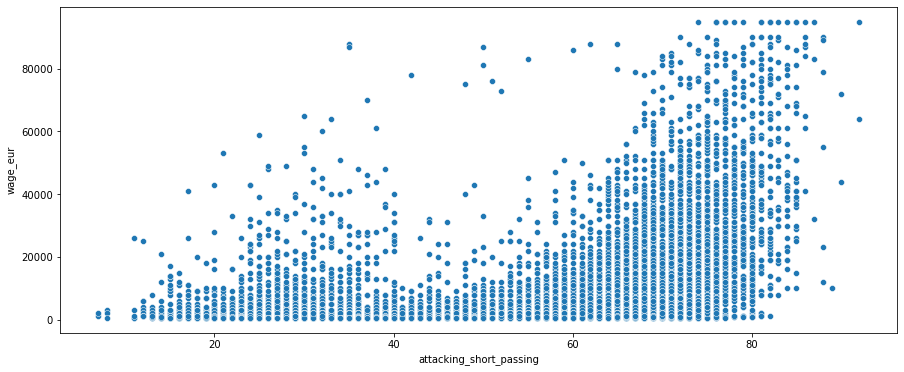

In [182]:
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["attacking_short_passing"],y=d["wage_eur"])


<AxesSubplot:xlabel='attacking_short_passing', ylabel='wage_eur'>

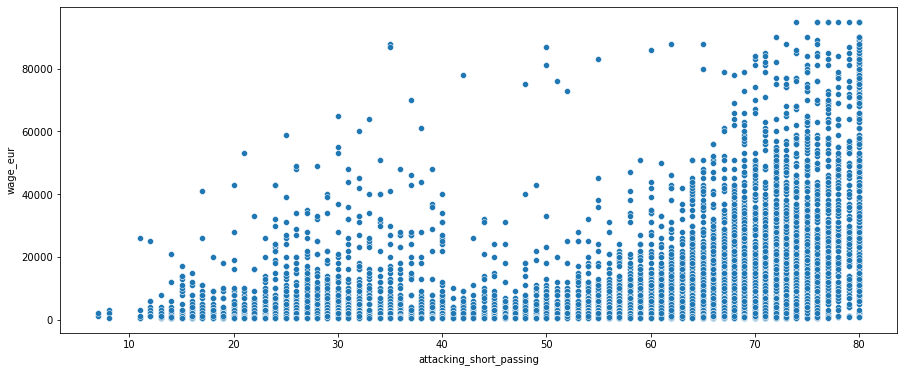

In [183]:
d["attacking_short_passing"] = np.where(d["attacking_short_passing"]>80 , 80 ,d["attacking_short_passing"])
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["attacking_short_passing"],y=d["wage_eur"])

<AxesSubplot:xlabel='skill_long_passing', ylabel='wage_eur'>

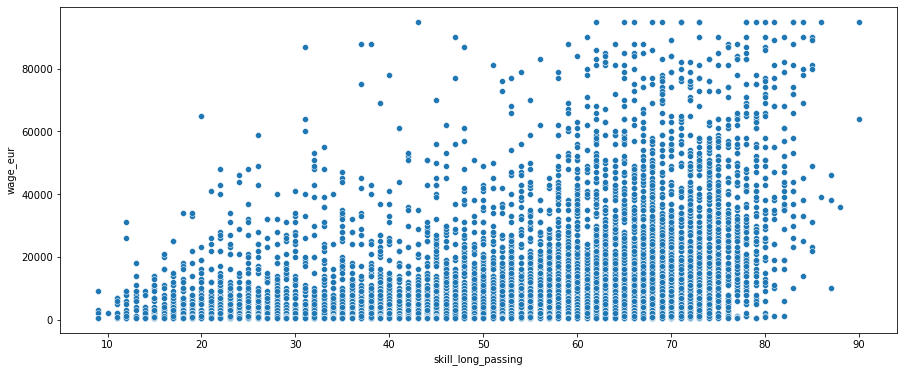

In [184]:
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["skill_long_passing"],y=d["wage_eur"])

<AxesSubplot:xlabel='skill_long_passing', ylabel='wage_eur'>

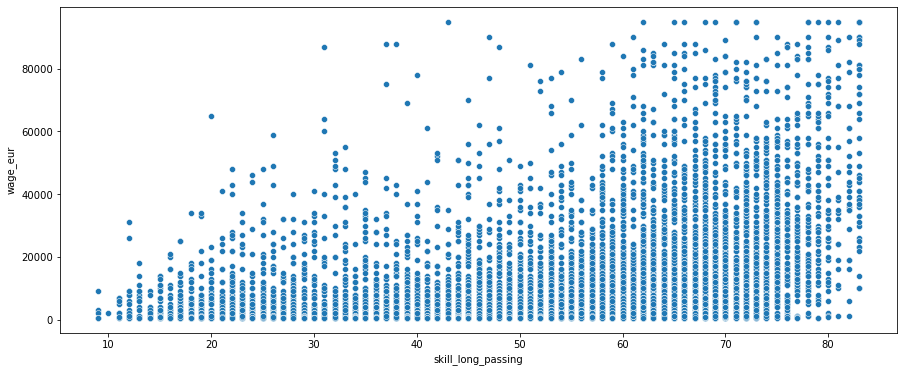

In [185]:
d["skill_long_passing"] = np.where(d["skill_long_passing"]>83 , 83 ,d["skill_long_passing"])
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["skill_long_passing"],y=d["wage_eur"])

<AxesSubplot:xlabel='attacking_crossing', ylabel='wage_eur'>

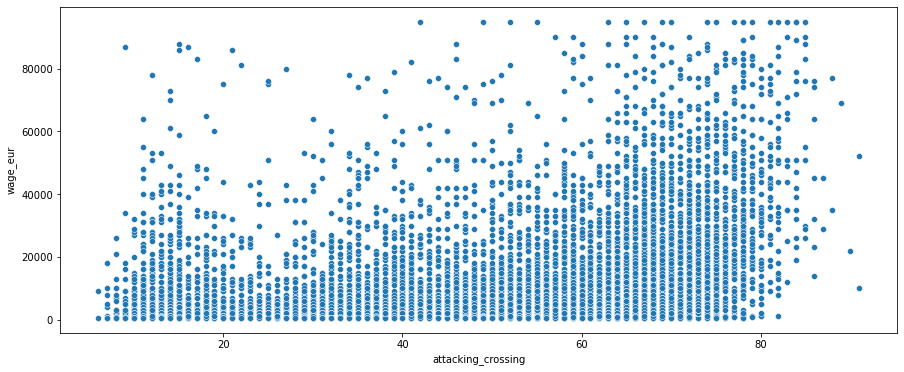

In [186]:
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["attacking_crossing"],y=d["wage_eur"])


<AxesSubplot:xlabel='attacking_crossing', ylabel='wage_eur'>

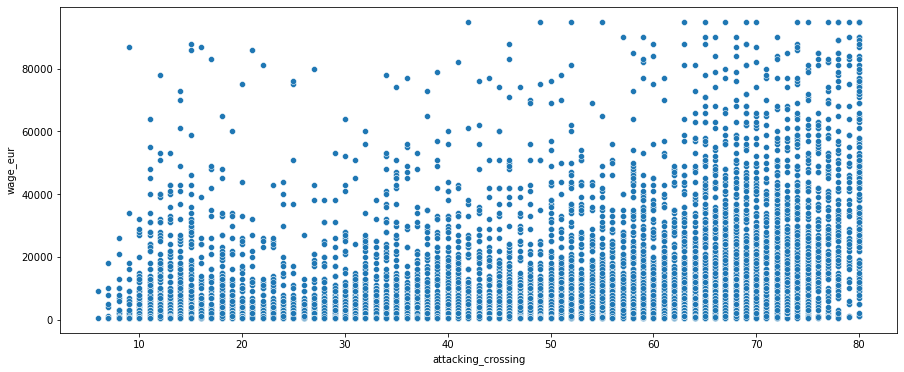

In [187]:
d["attacking_crossing"] = np.where(d["attacking_crossing"]>80 , 80 ,d["attacking_crossing"])
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["attacking_crossing"],y=d["wage_eur"])

<AxesSubplot:xlabel='attacking_finishing', ylabel='wage_eur'>

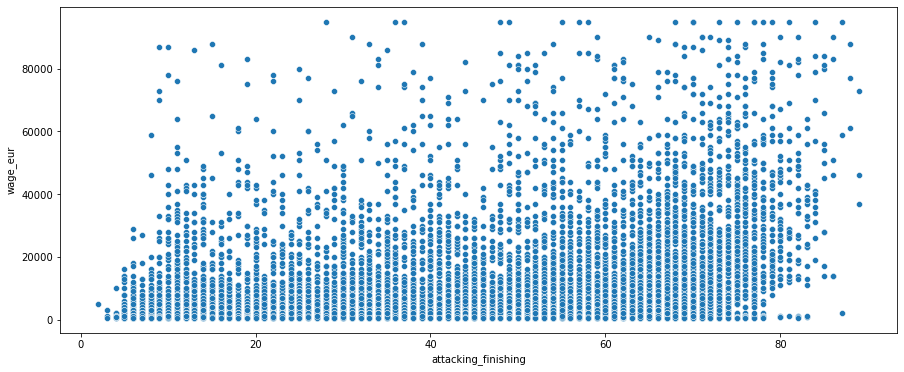

In [188]:
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["attacking_finishing"],y=d["wage_eur"])


<AxesSubplot:xlabel='attacking_finishing', ylabel='wage_eur'>

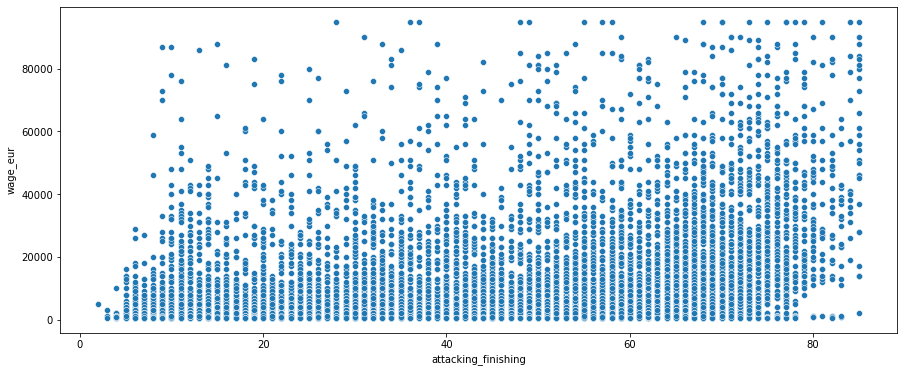

In [189]:
d["attacking_finishing"] = np.where(d["attacking_finishing"]>85 , 85 ,d["attacking_finishing"])
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["attacking_finishing"],y=d["wage_eur"])

<AxesSubplot:xlabel='attacking_heading_accuracy', ylabel='wage_eur'>

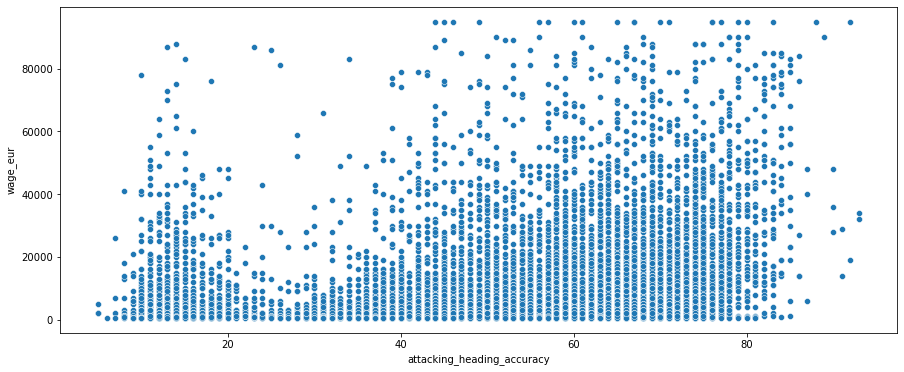

In [190]:
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["attacking_heading_accuracy"],y=d["wage_eur"])


<AxesSubplot:xlabel='attacking_heading_accuracy', ylabel='wage_eur'>

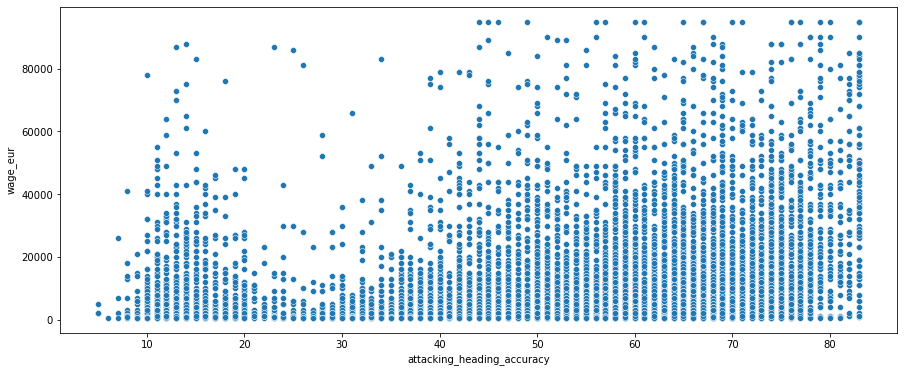

In [191]:
d["attacking_heading_accuracy"] = np.where(d["attacking_heading_accuracy"]>83 , 83 ,d["attacking_heading_accuracy"])
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["attacking_heading_accuracy"],y=d["wage_eur"])

<AxesSubplot:xlabel='attacking_volleys', ylabel='wage_eur'>

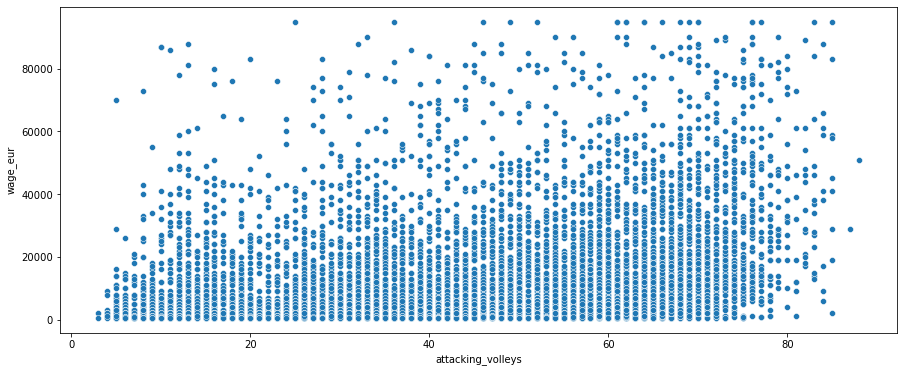

In [192]:
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["attacking_volleys"],y=d["wage_eur"])


<AxesSubplot:xlabel='attacking_volleys', ylabel='wage_eur'>

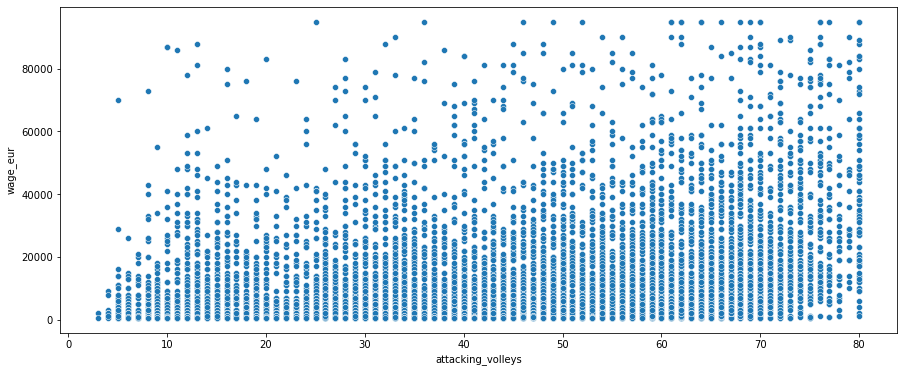

In [193]:
d["attacking_volleys"] = np.where(d["attacking_volleys"]>80 , 80 ,d["attacking_volleys"])
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["attacking_volleys"],y=d["wage_eur"])

<AxesSubplot:xlabel='skill_curve', ylabel='wage_eur'>

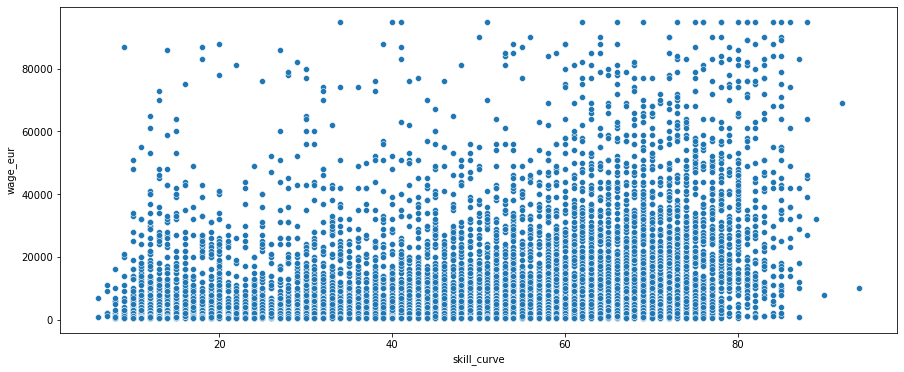

In [194]:
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["skill_curve"],y=d["wage_eur"])


<AxesSubplot:xlabel='skill_curve', ylabel='wage_eur'>

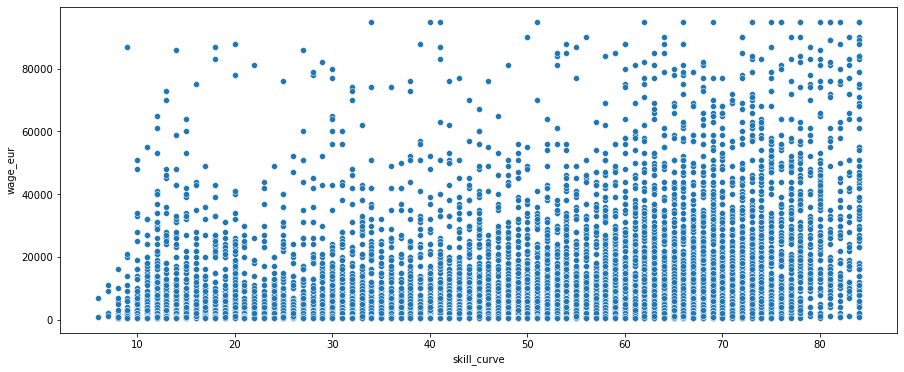

In [195]:
d["skill_curve"] = np.where(d["skill_curve"]>84 , 84 ,d["skill_curve"])
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["skill_curve"],y=d["wage_eur"])

<AxesSubplot:xlabel='skill_fk_accuracy', ylabel='wage_eur'>

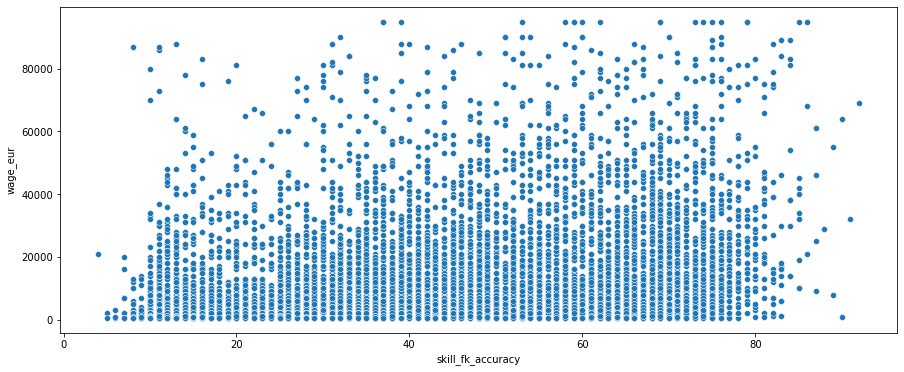

In [196]:
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["skill_fk_accuracy"],y=d["wage_eur"])


<AxesSubplot:xlabel='skill_fk_accuracy', ylabel='wage_eur'>

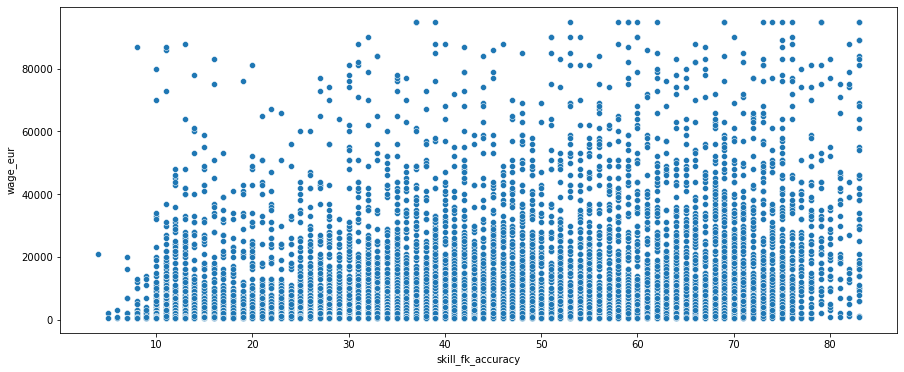

In [197]:
d["skill_fk_accuracy"] = np.where(d["skill_fk_accuracy"]>83 , 83 ,d["skill_fk_accuracy"])
plt.figure(figsize=((15,6)))
sns.scatterplot(x=d["skill_fk_accuracy"],y=d["wage_eur"])

<AxesSubplot:>

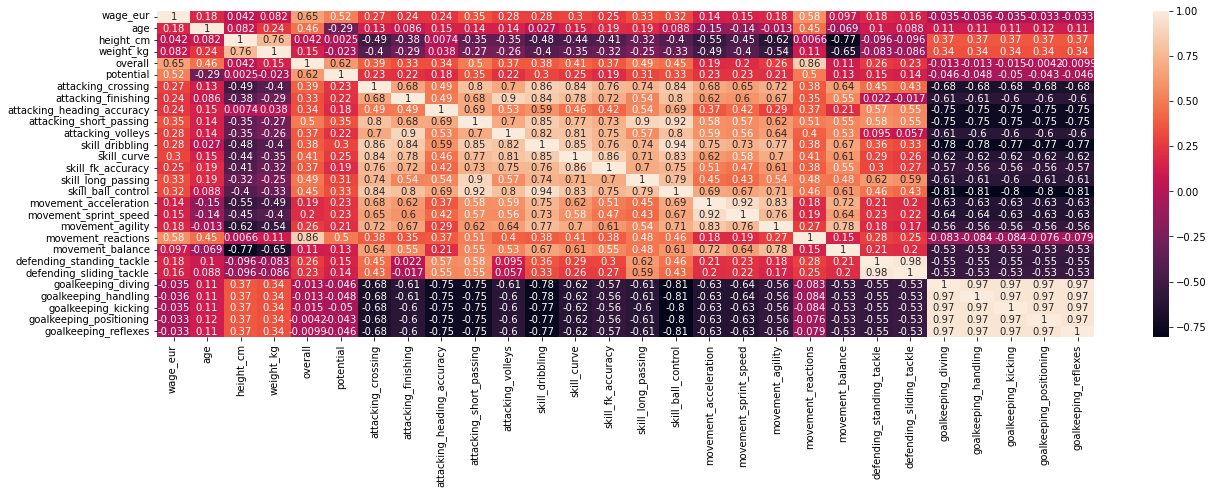

In [198]:
plt.figure(figsize=((21,6)))    # maximize figure size  
sns.heatmap(d.corr(),annot=True)  

In [199]:
d = d.drop(["movement_reactions","goalkeeping_diving","goalkeeping_handling","goalkeeping_kicking","goalkeeping_positioning"
        ,"goalkeeping_reflexes","movement_balance","height_cm","weight_kg","movement_acceleration","movement_sprint_speed"
        ,"movement_agility","age" ,"defending_standing_tackle","defending_sliding_tackle"],axis =1)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19008 entries, 7 to 19177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   wage_eur                    19008 non-null  float64
 1   nationality_name            19008 non-null  object 
 2   overall                     19008 non-null  float64
 3   potential                   19008 non-null  float64
 4   attacking_crossing          19008 non-null  float64
 5   attacking_finishing         19008 non-null  float64
 6   attacking_heading_accuracy  19008 non-null  float64
 7   attacking_short_passing     19008 non-null  float64
 8   attacking_volleys           19008 non-null  float64
 9   skill_dribbling             19008 non-null  float64
 10  skill_curve                 19008 non-null  float64
 11  skill_fk_accuracy           19008 non-null  float64
 12  skill_long_passing          19008 non-null  float64
 13  skill_ball_control          190

<AxesSubplot:>

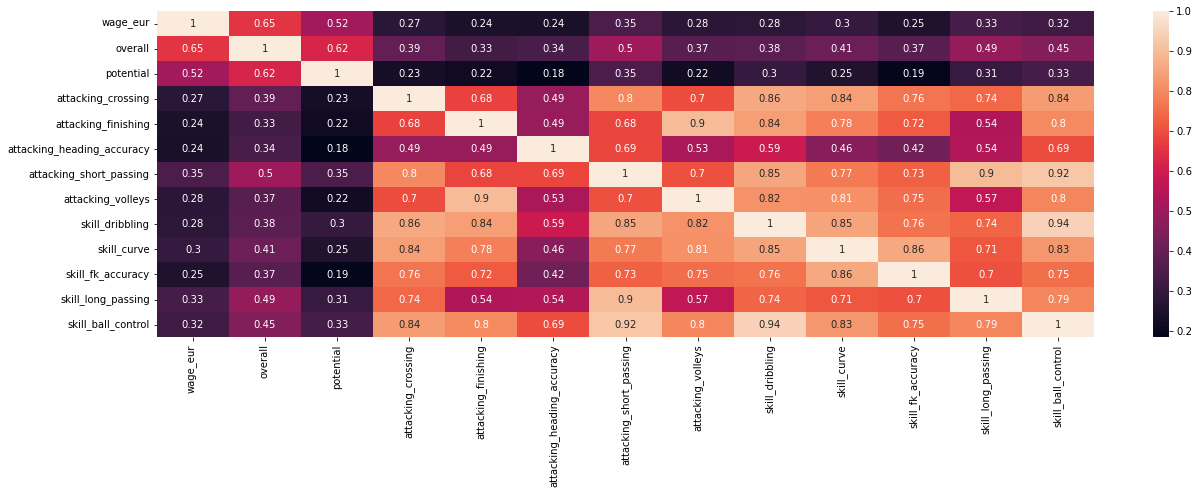

In [200]:
plt.figure(figsize=((21,6)))    # maximize figure size  
sns.heatmap(d.corr(),annot=True)  

In [201]:
d.describe()

,wage_eur,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control
count,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000
mean,7710.542929,65.593434,70.943340,49.379787,45.712332,51.646991,58.646622,42.261627,55.483007,47.051926,42.058554,52.875368,58.283407
std,12735.502906,6.674840,5.941119,17.896062,19.603130,17.205010,14.330247,17.481968,18.689909,18.019838,17.031555,14.914713,16.555275
min,500.000000,47.000000,49.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000
25%,1000.000000,61.000000,67.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000
50%,3000.000000,66.000000,71.000000,54.000000,50.000000,55.000000,62.000000,43.000000,61.000000,49.000000,41.000000,56.000000,63.000000
75%,8000.000000,70.000000,75.000000,63.000000,62.000000,64.000000,68.000000,56.000000,68.000000,61.000000,55.000000,64.000000,69.000000
max,95000.000000,89.000000,90.000000,80.000000,85.000000,83.000000,80.000000,80.000000,92.000000,84.000000,83.000000,83.000000,91.000000


In [202]:
d["nationality_name"].nunique()

163

In [203]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19008 entries, 7 to 19177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   wage_eur                    19008 non-null  float64
 1   nationality_name            19008 non-null  object 
 2   overall                     19008 non-null  float64
 3   potential                   19008 non-null  float64
 4   attacking_crossing          19008 non-null  float64
 5   attacking_finishing         19008 non-null  float64
 6   attacking_heading_accuracy  19008 non-null  float64
 7   attacking_short_passing     19008 non-null  float64
 8   attacking_volleys           19008 non-null  float64
 9   skill_dribbling             19008 non-null  float64
 10  skill_curve                 19008 non-null  float64
 11  skill_fk_accuracy           19008 non-null  float64
 12  skill_long_passing          19008 non-null  float64
 13  skill_ball_control          190

<AxesSubplot:xlabel='nationality_name', ylabel='wage_eur'>

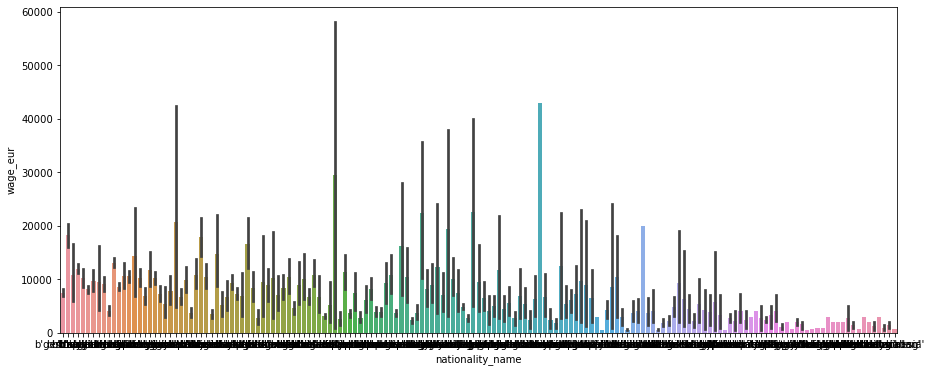

In [204]:
plt.figure(figsize=((15,6)))
sns.barplot(x=d["nationality_name"],y=d["wage_eur"])

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)  #first only random 
model = LinearRegression()
model.fit(x_train,y_train)      # trian data (known)
model.score(x_train,y_train)

0.394998666287509

In [206]:
model.score(x_test ,y_test)    # test data (unknown)   >> (low variance but high bias (error))

0.3844853270892753

In [207]:
p = PolynomialFeatures(degree=2,include_bias=False)    # drop bias 
new_x = p.fit_transform(x)

In [208]:
x_train, x_test, y_train, y_test = train_test_split(new_x,y,test_size=.2,random_state=42)  #first only random 
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)     # split new x 

0.6964806114317554

In [209]:
model.score(x_test ,y_test)    # test data (unknown)  (20% diff_ between trian and  test )  >> overfitting 

0.6748559334063226